In [ ]:
Import libraries

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [5]:
col_headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
cars = pd.read_csv(filename, names = col_headers)
cars.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [7]:
print(cars.isnull())

     symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0        False              False  False      False       False         False   
1        False              False  False      False       False         False   
2        False              False  False      False       False         False   
3        False              False  False      False       False         False   
4        False              False  False      False       False         False   
..         ...                ...    ...        ...         ...           ...   
200      False              False  False      False       False         False   
201      False              False  False      False       False         False   
202      False              False  False      False       False         False   
203      False              False  False      False       False         False   
204      False              False  False      False       False         False   

     body-style  drive-whee

In [8]:
cars = cars.replace('?', np.nan)

In [9]:
colna_sum = cars.isnull().sum()
print("Columns with NA values")
print("")
print(colna_sum[colna_sum>0])
print("")
print("Total NA values = {naval_sum:n}".format(naval_sum = cars.isnull().sum().sum()))

Columns with NA values

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

Total NA values = 59


In [10]:
cars = cars[cars['price'].notna()]

In [11]:
def replacena_mean(df,k):
    for i in k:
        a = df[i].astype('float').mean(axis =0)
        df[i].replace(np.nan,a,inplace = True)
    return df

def replacena_mode(df,k):
    for i in k:
        df[i].fillna(df[i].mode()[0], inplace = True)
    return df

In [12]:
cq1 = ['normalized-losses', 'bore', 'stroke', 'horsepower',
       'peak-rpm']
cq2 =  ['num-of-doors']
replacena_mean(cars,cq1)
replacena_mode(cars,cq2)
colna_sum = cars.isnull().sum()
colna_sum[colna_sum>0]

Series([], dtype: int64)

In [13]:
cars.reset_index()

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [14]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
cars['city-L/100km'] = 235/cars['city-mpg']
cars['highway-L/100km'] = 235/cars['highway-mpg']
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,10.217391,8.392857
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,12.368421,9.400000
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,13.055556,10.217391
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,9.038462,8.703704


In [16]:
cars[['length', 'width', 'height']] = cars[['length', 'width', 'height']]/cars[['length', 'width', 'height']].max()
cars[['length', 'width', 'height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
200,0.907256,0.956944,0.928094
201,0.907256,0.955556,0.928094
202,0.907256,0.956944,0.928094
203,0.907256,0.956944,0.928094


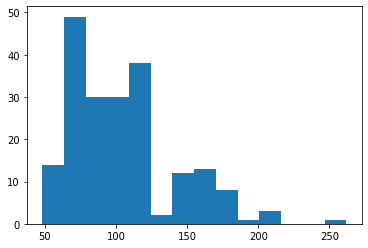

In [25]:
cars['horsepower'] = cars['horsepower'].astype('int')
plt.hist(cars.horsepower, bins='auto', rwidth=2, histtype='bar');

In [26]:
cars['horsepower-binned'] = pd.cut(cars['horsepower'], bins = 3, labels = ['low','medium','high'])

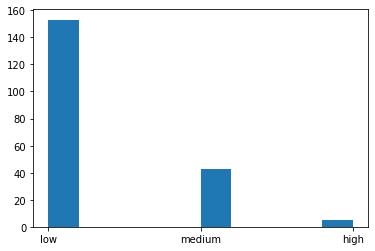

In [27]:
plt.hist(cars['horsepower-binned']);

In [20]:
pd.get_dummies(cars[['fuel-type','aspiration']])
pd.get_dummies(cars[['fuel-type','aspiration']]).columns

Index(['fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo'],
      dtype='object')

In [21]:
cars[['fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo']] = pd.get_dummies(cars[['fuel-type','aspiration']])

In [22]:
cars.drop('fuel-type', axis = 1, inplace=True)

In [23]:
cars.drop('aspiration', axis = 1, inplace=True)

In [24]:
cars

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495,11.190476,8.703704,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500,11.190476,8.703704,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500,12.368421,9.038462,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950,9.791667,7.833333,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450,13.055556,10.681818,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23,28,16845,10.217391,8.392857,low,0,1,1,0
201,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,19,25,19045,12.368421,9.400000,medium,0,1,0,1
202,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,18,23,21485,13.055556,10.217391,medium,0,1,1,0
203,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,26,27,22470,9.038462,8.703704,low,1,0,0,1
